# Linear Regression

_Notebook orignially contributed by: [Aditya-1500](https://github.com/Aditya-1500)_

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github.com/Rishit-dagli/Python3-by-practice/blob/master/Machine%20Learning/sklearn%20examples/Linear%20Regression/Linear%20Regression%20.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Rishit-dagli/Python3-by-practice/blob/master/Machine%20Learning/sklearn%20examples/Linear%20Regression/Linear%20Regression%20.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

The following notebook uses a customer dataset (does not contain any original values) for a company in order to determine whether to focus their efforts on their mobile app experience or their website.
It is followed by a series of steps involving data visualisation and applying Machine Learning Algorithm (Linear Regression).

We use the <a href="https://www.kaggle.com/srolka/ecommerce-customers">Ecommerce Customers</a> Dataset originally contributed by <a href="https://www.kaggle.com/srolka">Steven Rolka</a>

## Imports
Importing required libraries for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

The file used here is Ecommerce Customers csv file. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [3]:
customers = pd.read_csv("Ecommerce Customers")

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Exploratory Data Analysis
___
Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.

In [10]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

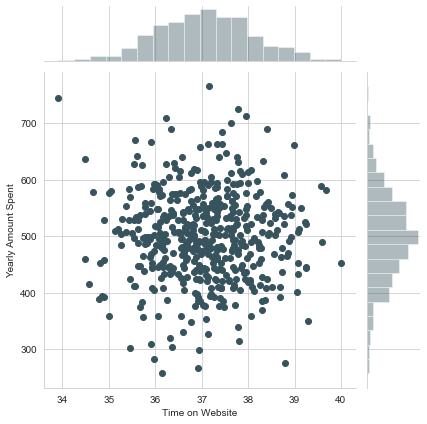

In [11]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

The jointplot above shows that more the Time Spent on Website, more is The Yearly Amount Spent

Creating a jointplot between Time on App and Yearly Amount Spent Column

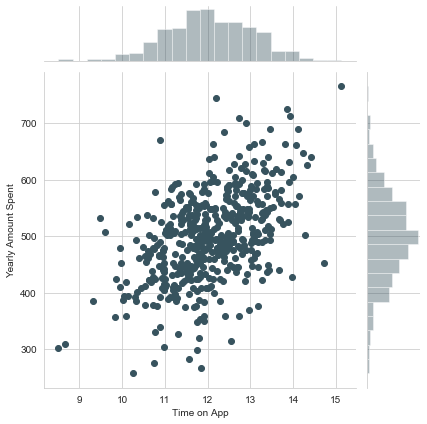

In [12]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

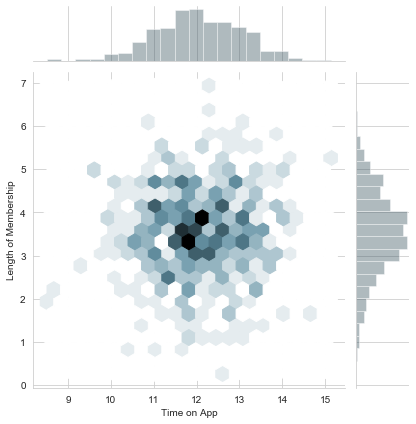

In [13]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind="hex")

Let's explore these types of relationships across the entire data set. Using pairplot to recreate the plot below.

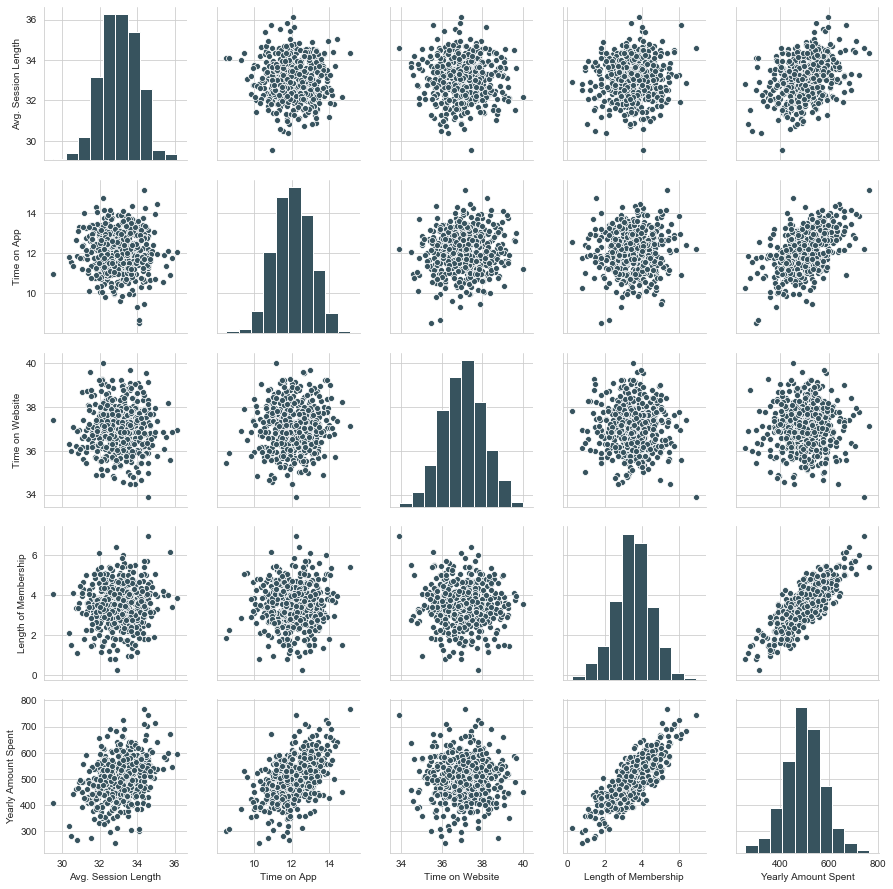

In [14]:
sns.pairplot(customers)

Based on above plot, the attribute 'Length of Membership' seems to be most coorelated to 'Yearly Amount Spent'.

Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.

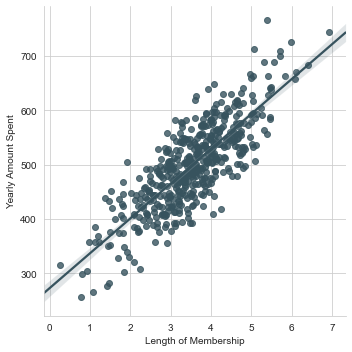

In [15]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [16]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Training the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('Coefficients:\n',lm.coef_)

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

In [24]:
predictions = lm.predict(X_test)

Visualizing real test values versus the predicted values using scatterplot.

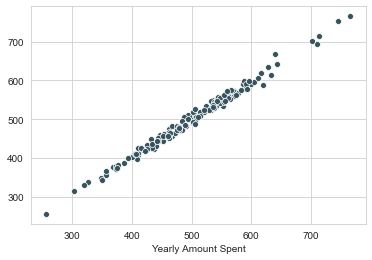

In [25]:
sns.scatterplot(x=y_test,y=predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [27]:
from sklearn import metrics

In [28]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error: 7.228148653430853
Mean Squared Error: 79.81305165097487
Root Mean Squared Error: 8.933815066978656


## Residuals


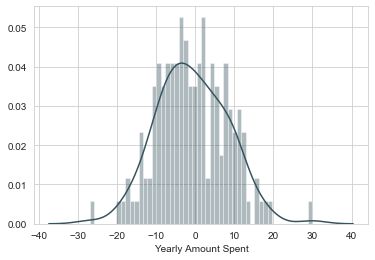

In [29]:
sns.distplot(y_test-predictions,bins=50)



## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [30]:
lm.coef_
pd.DataFrame(index=['Avg. Session Length','Time on App','Time on Website','Length of Membership'],columns=['Coefficient'],data=lm.coef_)

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


* Keeping others constant, a unit increase in Avg. Session Length means an increase of 25.98 dollars spent
* Keeping others constant, a unit increase in Time on App means an increase of 38.59 dollars spent
* Keeping others constant, a unit increase in Time on Website means an increase of 0.19 dollars spent
* Keeping others constant, a unit increase in Length of Membership means an increase of 61.28 dollars spent

Based on the coefficients, focussing more on the mobile app would be beneficial but attention should be given to the length of membership factor too...



